## Impact of the parameters: Extragalactic medium

Analytic expressions and simple case.ipynb has shown that time delay and halo
extension of the cascades are related together but also with external 
parameters such as extra galactic magnetic field or source jet opening angle. 
In a realistic case source photons are not distinguishable from cascade 
photons. Moreover as shown in Target_spectrum_and_absorption.ipynb for sources 
further than $z=0.1$, TeV band is fully absorbed. Considering the two previous 
considerations, in this part is studied the dependency of the mean arrival 
angle and the mean time delay in the GeV band versus the different
parameters. 

Here is studied a more realistic case:
* z=0.1
* source spectrum is generated assuming a powerlaw spectrum (between Emin=1MeV and Emax=100TeV)
* EGMF (turbulent magnetic field): 1E-15 Gauss, L_B= 1 Mpc
* EBL model: Dominguez

This part aims to draw characteristic quantities (average arrival angle and time delay) versus EGMF and redshift

Because for redshift upper than 1 there is no TeV photons, we will use the GeV band

#### Cas mono-énergétique

* plus simple à comprendre et interpréter
* z=0.1

### EBL model 

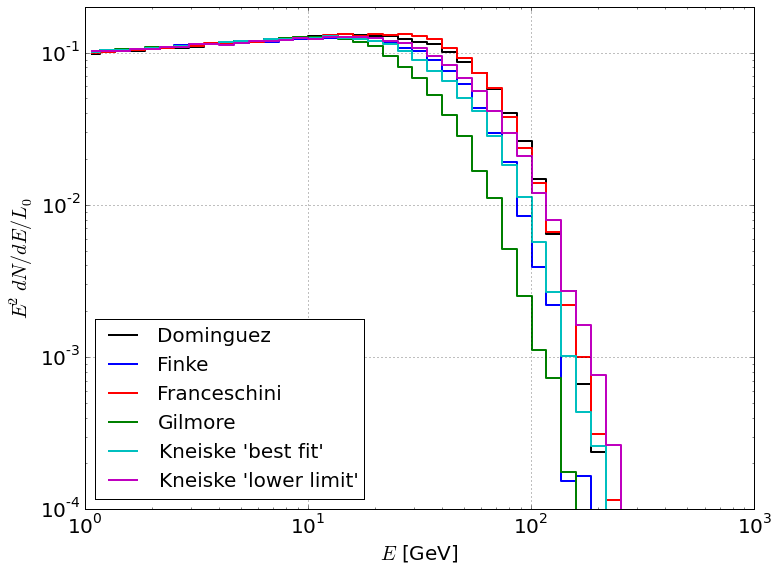

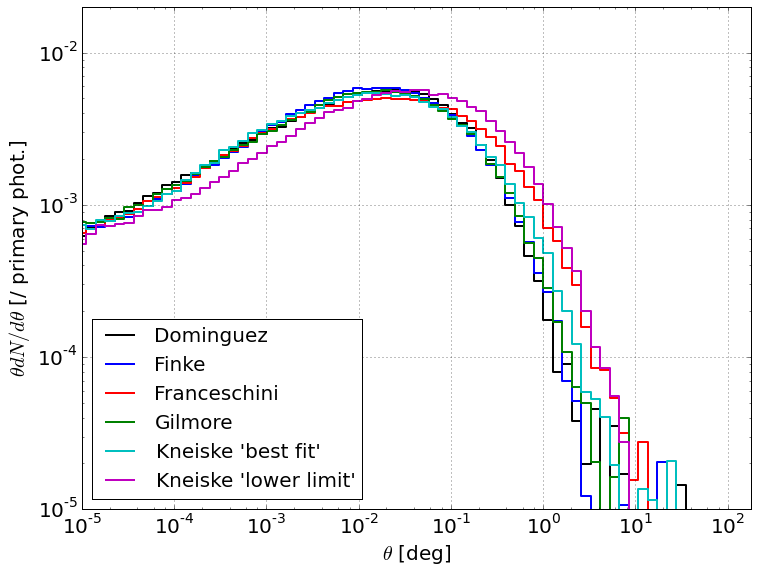

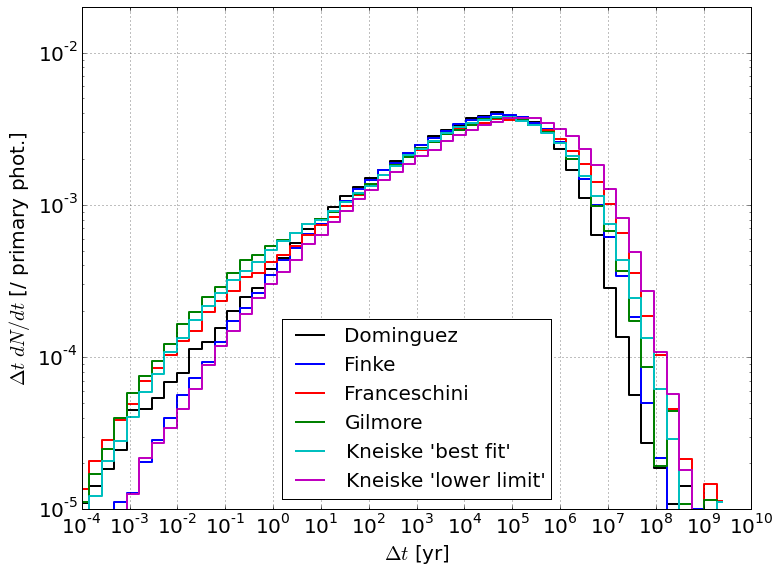

In [1]:
%matplotlib inline
import src.distribution
simus  = ["Dominguez","Finke","Franceschini","Gilmore","Kneiske 'best fit'","Kneiske 'lower limit'"]
colors = ['k','b','r','g','c','m','y']
src.distribution.drawSpectrum(simus,colors=colors,yrange=[1e-4,2e-1],Erange=[1e0,1e3],save='Spectrum_vs_EBL.eps')
src.distribution.drawArrivalAngle(simus,colors=colors,yrange=[1e-5,2e-2],save='dNdtheta_vs_EBL.eps')
src.distribution.drawTiming(simus,colors=colors,yrange=[1e-5,2e-2])

On the other hand the extragalactic light (EBL) can affect the absorption of the gamma-rays. Figure 
shows the spectrum Acomputed for a source emitting isotropically with a spectral index of 2 at a 
redshift z=2 using 6 different EBL models \citep{franceschini_extragalactic_2008,
dominguez_extragalactic_2010, finke_modeling_2010, kneiske_lower-limit_2010,
gilmore_semi-analytic_2011}. Differences only appear at energy up-to 1TeV and are due to the 
probability of gamma-rays absorption. Then the model chosen will impact the cut-off energy
with respect to the results shown in Target_spectrum_and_absorption.ipynb.


### EGMF

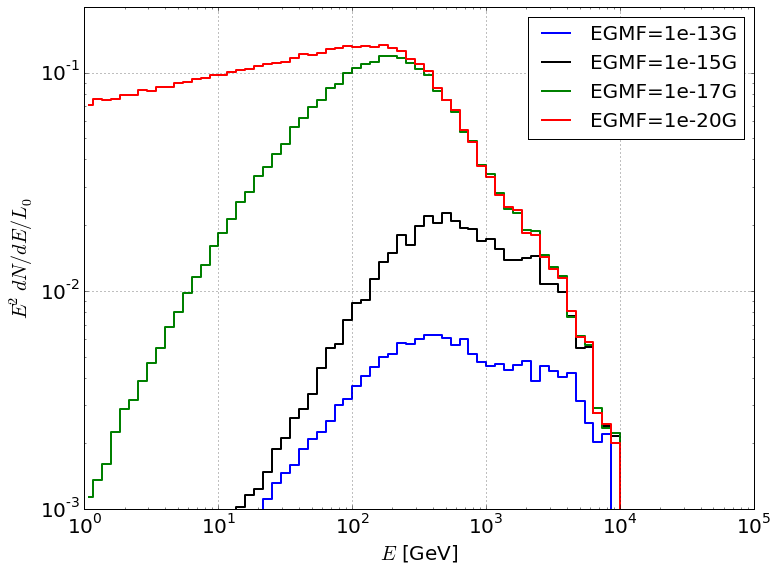

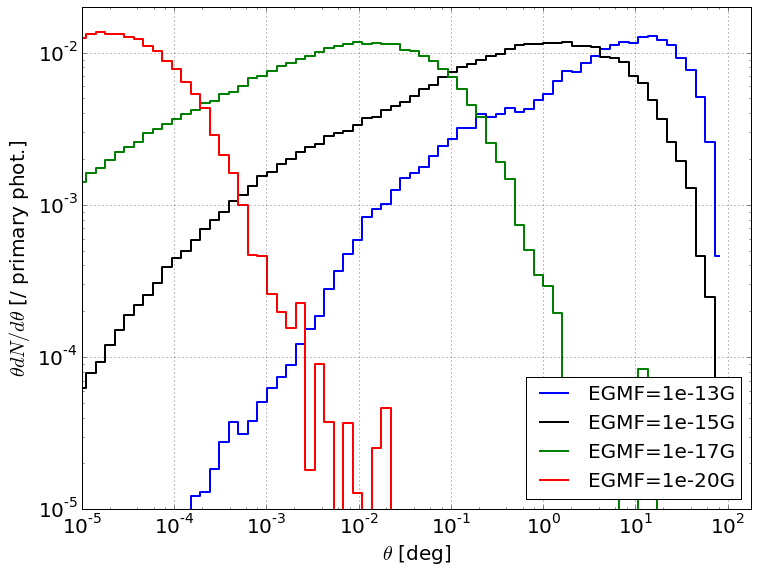

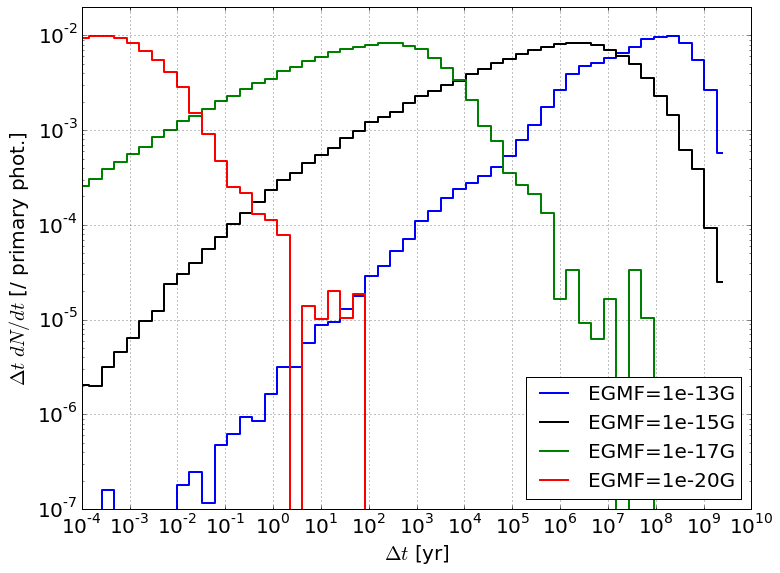

In [2]:
%matplotlib inline
import src.distribution
simus  = ["EGMF=1e-13G","EGMF=1e-15G","EGMF=1e-17G","EGMF=1e-20G"]
colors = ['b','k','g','r','c','m','y']
src.distribution.drawSpectrum(simus,plot="1month",colors=colors,yrange=[1e-3,2e-1])
src.distribution.drawArrivalAngle(simus,colors=colors,yrange=[1e-5,2e-2])
src.distribution.drawTiming(simus,colors=colors,yrange=[1e-7,2e-2])

The spectrum generated by the cascade depends also on the extragalactic medium. The extragalactic 
magnetic field (either amplitude or coherence length) has no impact on the spectrum integrated over
the full-sky and with an infinite integration time. If a limited aperture is applied, then part of 
the photons too much deflected are not taken  into account. This deflection is directly
related to the EGMF. For the same reason, applying a finite exposure time, corresponding to a finite 
time of activity of the source, will alter the spectrum shape depending on the EGMF strength. This has been shown in 
\cite{taylor_extragalactic_2011}. Figure shows the
spectrum integrated over the full sky and a time range of 10 years. Impact of the EGMF can
be seen on the 10 GeV - 10 TeV region of the spectrum. 

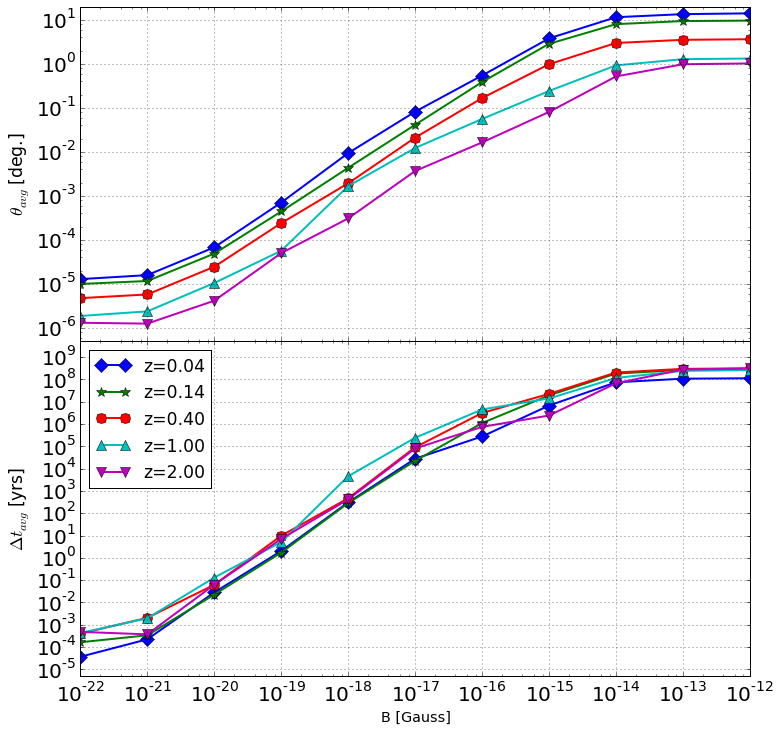

In [2]:
%matplotlib inline
from matplotlib.pyplot import figure, show, setp, savefig
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D
from numpy import log10, loadtxt
from src.analytic import Ee, Delta, pi
from src.read import path_to_fig_dir

import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['ps.fonttype'] = 42

#fig = figure(figsize=(12,9))
#ax = fig.add_subplot(111,projection='3d')  

fig1 = figure(figsize=(12,12))
gs1 = gridspec.GridSpec(2, 1, height_ratios=[1,1]) 
fig1.subplots_adjust(hspace=0.001)
ax11 = fig1.add_subplot(gs1[0])
ax12 = fig1.add_subplot(gs1[1],sharex=ax11)

#fig2 = figure(figsize=(12,12))
#gs2 = gridspec.GridSpec(2, 1, height_ratios=[1,1]) 
#fig2.subplots_adjust(hspace=0.001)
#ax21 = fig2.add_subplot(gs2[0])
#ax22 = fig2.add_subplot(gs2[1],sharex=ax11)

theta_mean  = loadtxt("Results/theta_mean_vs_EGMF.dat")
dt_mean     = loadtxt("Results/delay_mean_vs_EGMF.dat")
#theta_mean1 = loadtxt("Results/theta_mean_vs_EGMF-gen=1.dat")
#dt_mean1    = loadtxt("Results/delay_mean_vs_EGMF-gen=1.dat")
#theta_mean2 = loadtxt("Results/theta_mean_vs_EGMF-gen=2.dat")
#dt_mean2    = loadtxt("Results/delay_mean_vs_EGMF-gen=2.dat")

Redshifts = theta_mean[1:,0]
B         = theta_mean[0,1:]

i=1
marks = ['D','*','o','^','v']
for z in Redshifts:
   #p=ax.plot(log10(theta_mean[i,1:]),log10(dt_mean[i,1:]),log10(B),":*",label="z=%1.2f"%z)
   
   p=ax11.plot(B,theta_mean[i,1:],'-',marker=marks[i-1],markersize=10,linewidth=2)
   ax12.plot(B,dt_mean[i,1:],'-',marker=marks[i-1],markersize=10,color=p[0].get_color(),linewidth=2,label="z=%1.2f"%z)
   
   #ax21.plot(B,Delta(Ee(1000,float(z)),B,1,float(z)),linestyle='-',color=p[0].get_color())      
   #ax21.plot(B,theta_mean1[i,1:],'--*',color=p[0].get_color())
   #ax21.plot(B,theta_mean2[i,1:],':.',color=p[0].get_color())
   #ax22.plot(B,dt_mean1[i,1:]   ,'--*',color=p[0].get_color(),label="z=%1.2f"%z)
   #ax22.plot(B,dt_mean2[i,1:]   ,':.',color=p[0].get_color())
      
   i+=1

#ax11.axhline(y=0.5,color="k",linestyle="--",linewidth=2)
#ax12.axhline(y=5,color="k",linestyle="--",linewidth=2)
   
#ax.legend(loc="best",fontsize="xx-large")
#ax.set_xlabel("$\\theta$ [deg]",fontsize="xx-large")
#ax.set_ylabel("Time delay [yrs]",fontsize="xx-large")
#ax.set_zlabel(" log B [Gauss]",fontsize="xx-large")

ax11.set_xscale('log')   
ax11.set_yscale('log')
ax11.set_ylim([5e-7,20])
ax11.grid(b=True,which='major')
#ax11.legend(loc="best")
ax11.set_xlabel("B [Gauss]",fontsize="x-large")
ax11.set_ylabel("$\\theta_{avg}$ [deg.]",fontsize="xx-large")
xticklabels = ax11.get_xticklabels()
setp(xticklabels, visible=False)

ax12.set_xscale('log')   
ax12.set_yscale('log')
ax12.set_ylim([5e-6,5e9])
ax12.grid(b=True,which='major')
ax12.legend(loc="best",fontsize="xx-large")
ax12.set_xlabel("B [Gauss]",fontsize="x-large")
ax12.set_ylabel("$\\Delta t_{avg}$ [yrs]",fontsize="xx-large")

#ax21.set_xscale('log')   
#ax21.set_yscale('log')
#ax21.set_ylim([0.8e-4,20])
#ax21.grid(b=True,which='major')
#ax21.legend(loc="best")
#ax21.set_xlabel("B [Gauss]",fontsize="x-large")
#ax21.set_ylabel("average arrival angle [degre]",fontsize="xx-large")
#xticklabels = ax21.get_xticklabels()
#setp(xticklabels, visible=False)

#ax22.set_xscale('log')   
#ax22.set_yscale('log')
#ax22.set_ylim([1,0.8e9])
#ax22.grid(b=True,which='major')
#ax22.legend(loc="best",fontsize="xx-large")
#ax22.set_xlabel("B [Gauss]",fontsize="x-large")
#ax22.set_ylabel("average time delay [yrs]",fontsize="xx-large")

savefig(path_to_fig_dir+"mean_Dt_theta_vs_EGMF.eps",bbox_inches='tight')  

show()

Figures  show, respectively, the mean arrival angle and the mean time delay in 
the GeV band versus extragalactic magnetic field amplitude for a source at 
different redshifts. For magnetic field stronger than $10^{-14}$G, whatever is 
the redshift, mean time delay and arrival angle is constant because leptons are 
trapped in a region closed to there production site. Thus all the photons seems 
arriving under the same angle and the time delay is isotropized. This 
isotropization appends because Larmor radius is really smaller than the 
coherence length of the magnetic field (EGMF).


For soft magnetic field ($B \ll 10^{-12}$G), both, time delay and halo show a 
dependency on the magnetic field amplitude as predicted by equations 
$$
\theta = \arcsin \left( \frac{\lambda_{\gamma \gamma}}{D_s} \sin\delta \right)
$$
and 
$$
c \Delta t = \lambda_{\gamma\gamma} (1- \cos \delta) - D_s (1- \cos \theta)
$$ 
The stronger the magnetic field, the 
more deflected the leptons and thus the arrival angle. Mean size 
of the halo and time delay is also affected by the redshift of the source. The 
further the source, the lower the halo extension and the time delay between 
photons. Indeed the size of the halo is corresponding to a virtual source of 
size $\lambda_{\gamma\gamma}$. The further this virtual source, the smaller the 
observed angular size. Moreover previous equation shows that 
time delay is directly related to the arrival angle. This equation point out 
that if distance to the source (i.e. redshift) grows then time delay will be 
reduced as highlighted in time delay panel. 

Finally, it appears that measure amplitude of the extragalactic magnetic field 
through halos requires to select the sources. If the EMGF is too weak 
($<10^{-16}$G), halo effect can be observed only on close sources. Far sources 
will appear as point sources. On the other hand, intermediate magnetic field 
amplitude ($10^{-16} \textrm{G}<\textrm{B}<10^{-14}$G) can study on further 
sources. At the opposite, time delay study requires weak magnetic field
and far sources (z$>0.5$), otherwise average time delay is upper than ten years.

## Impact of the coherence length $\lambda_B$

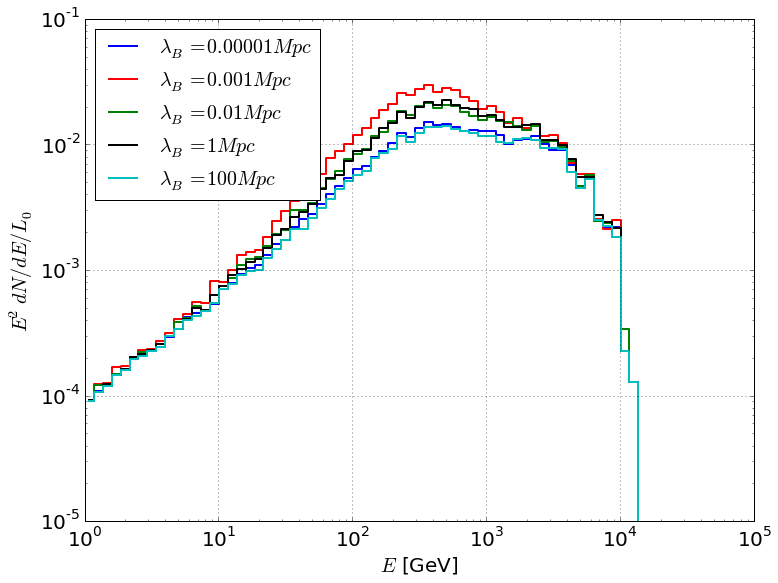

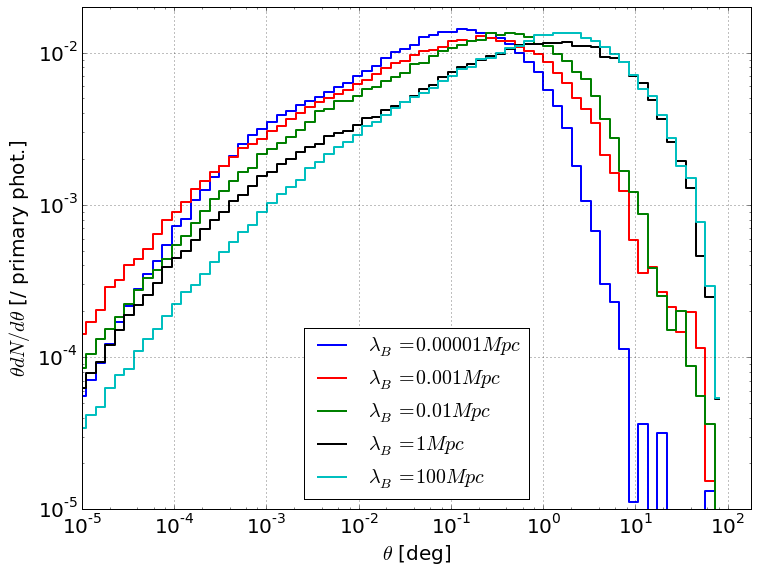

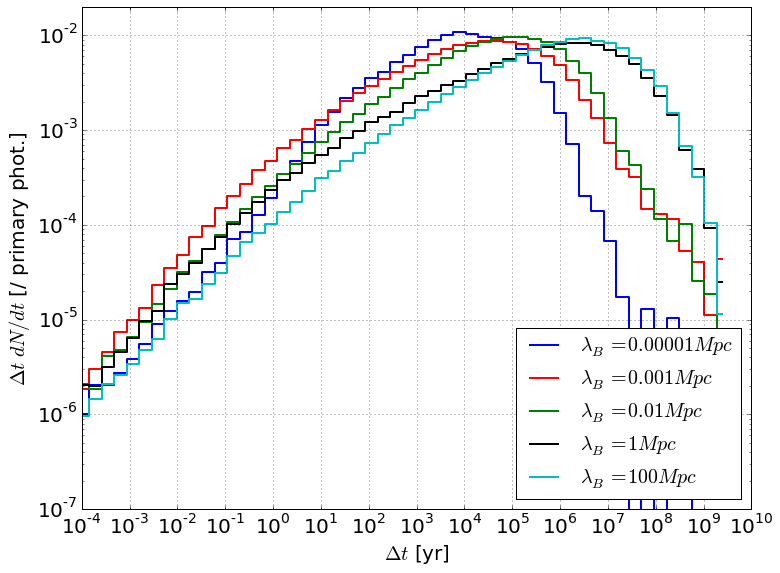

In [3]:
%matplotlib inline
import src.distribution
simus  = ["lambda_B=0.00001Mpc","lambda_B=0.001Mpc","lambda_B=0.01Mpc","lambda_B=1Mpc","lambda_B=100Mpc"]
colors = ['b','r','g','k','c','m','y']
src.distribution.drawSpectrum(simus,plot="1month",colors=colors,yrange=[1e-5,1e-1])
src.distribution.drawArrivalAngle(simus,colors=colors,yrange=[1e-5,2e-2])
src.distribution.drawTiming(simus,colors=colors,yrange=[1e-7,2e-2])

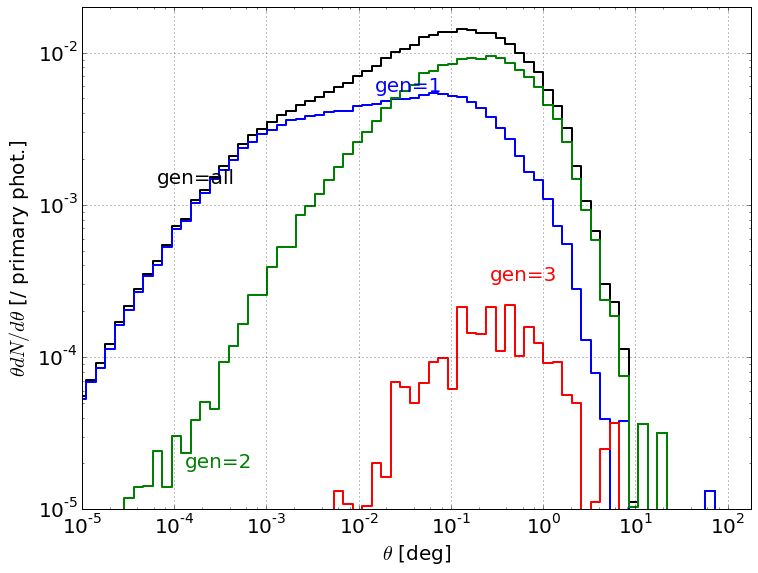

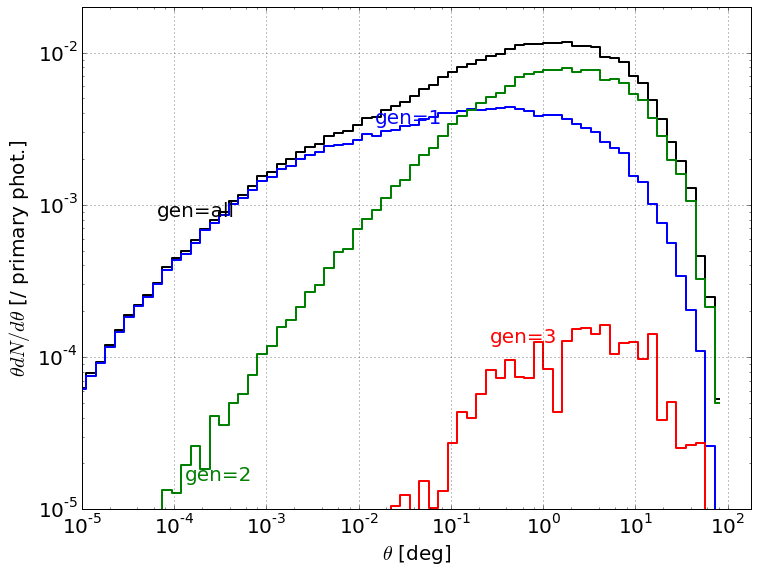

In [6]:
%matplotlib inline
import src.distribution
colors = ['k','r','g','k','c','m','y']
src.distribution.drawArrivalAngle(["lambda_B=0.00001Mpc"],colors=colors,plot="generation",yrange=[1e-5,2e-2])
src.distribution.drawArrivalAngle(["lambda_B=1Mpc"],colors=colors,plot="generation",yrange=[1e-5,2e-2])

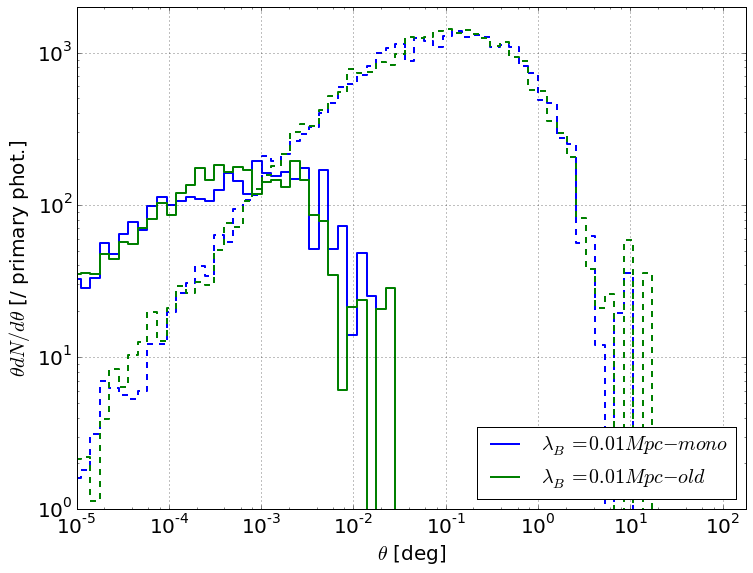

In [17]:
%matplotlib inline
import modules.distribution
colors = ['b','r','g','k','c','m','y']
simus  = ["lambda_B=0.01Mpc-mono","lambda_B=1Mpc-mono","lambda_B=100Mpc-mono"]
simus  = ["lambda_B=0.01Mpc-mono","lambda_B=0.01Mpc-old"]
modules.distribution.drawArrivalAngle(simus,colors=colors,yrange=[1e0,2e3],plot='generation')

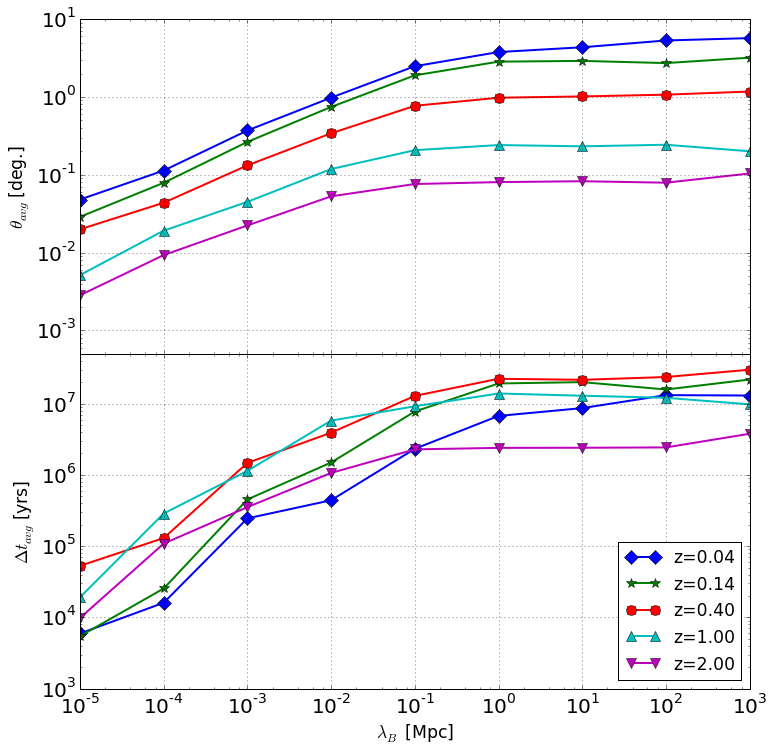

In [3]:
%matplotlib inline
from matplotlib.pyplot import figure, show, setp, savefig
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D
from numpy import log10, loadtxt, arange
from src.analytic import Ee, Delta, Dic, RL, yr
from src.read import path_to_fig_dir

import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['ps.fonttype'] = 42

#fig = figure(figsize=(12,9))
#ax = fig.add_subplot(111,projection='3d')  

fig1 = figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 1, height_ratios=[1,1]) 
fig1.subplots_adjust(hspace=0)
ax1 = fig1.add_subplot(gs[0])
ax2 = fig1.add_subplot(gs[1],sharex=ax1)

theta_mean = loadtxt("Results/theta_mean_vs_LB.dat")
dt_mean = loadtxt("Results/delay_mean_vs_LB.dat")

Redshifts = theta_mean[1:,0]
LB        = theta_mean[0,1:]

i=1
marks = ['D','*','o','^','v']
nLB = 5000
LBmin = 1e-4
LBmax = 1e4
L = LBmin*(LBmax/LBmin)**(arange(nLB)/(nLB-1.))
for z in Redshifts:
    #p=ax.plot(theta_mean[i,1:],log10(dt_mean[i,1:]),log10(LB),":*",label="z=%1.2f"%z)
    p=ax1.plot(LB,theta_mean[i,1:],'-',marker=marks[i-1],markersize=10,linewidth=2)
    #ax1.plot(L,Delta(Ee(1000,float(z)),1e-15,L,float(z)),linestyle='-',color=p[0].get_color())
    #ax1.axvline(x=Dic(Ee(1000,float(z)),float(z)),ymin=0.,ymax=10.,color=p[0].get_color(),linestyle='--')
    ax2.plot(LB,dt_mean[i,1:],'-',marker=marks[i-1],markersize=10,color=p[0].get_color(),linewidth=2,label="z=%1.2f"%z)
    i+=1

#ax.legend(loc="best",fontsize="xx-large")
#ax.set_xlabel("$\\theta$ [deg]",fontsize="x-large")
#ax.set_ylabel("Time delay [yrs]",fontsize="x-large")
#ax.set_zlabel(" log $\\lambda_B$ [Mpc]",fontsize="x-large")

ax1.set_xscale('log')   
ax1.set_yscale('log')
ax1.set_ylim([5e-4,10])
ax1.grid(b=True,which='major')
#ax1.legend(loc="best")
ax1.set_xlabel("$\\lambda_B$ [Mpc]",fontsize="xx-large")
ax1.set_ylabel("$\\theta_{avg}$ [deg.]",fontsize="xx-large")
xticklabels = ax1.get_xticklabels()
setp(xticklabels, visible=False)

ax2.set_xscale('log')   
ax2.set_yscale('log')
ax2.set_ylim([1e3,5e7])
ax2.grid(b=True,which='major')
ax2.legend(loc="best",fontsize="xx-large")
ax2.set_xlabel("$\\lambda_B$ [Mpc]",fontsize="xx-large")
ax2.set_ylabel("$\\Delta t_{avg}$ [yrs]",fontsize="xx-large")

savefig(path_to_fig_dir+"mean_Dt_theta_vs_LB.eps",bbox_inches='tight')  

show()

In [1]:
from src.read import select_events
from src.constants import yr, degre
from numpy import average

for zi in ["0.14","0.4"]:
   for LBi in ["0.001","0.0001","0.00001"]:
      fileId="Simulations/z="+zi+"/lambda_B="+LBi+"Mpc"
      weight, energy, time, theta, phi, Esource, generation = select_events(fileId,Erange=[1,1e3],powerlaw_index=1.2)
      print zi, "\t", LBi, "Mpc:\t", average(time,weights=weight)/yr, "yr,\t", average(theta,weights=weight)/degre, "deg."

0.14 	0.001 Mpc:	453332.807238 yr,	0.2644290851 deg.
0.14 	0.0001 Mpc:	25493.352816 yr,	0.0789632921372 deg.
0.14 	0.00001 Mpc:	5462.34762181 yr,	0.0288115800585 deg.
0.4 	0.001 Mpc:	1475941.33172 yr,	0.132015394722 deg.
0.4 	0.0001 Mpc:	132500.99531 yr,	0.0813706342669 deg.
0.4 	0.00001 Mpc:	461463.518486 yr,	0.163037647745 deg.


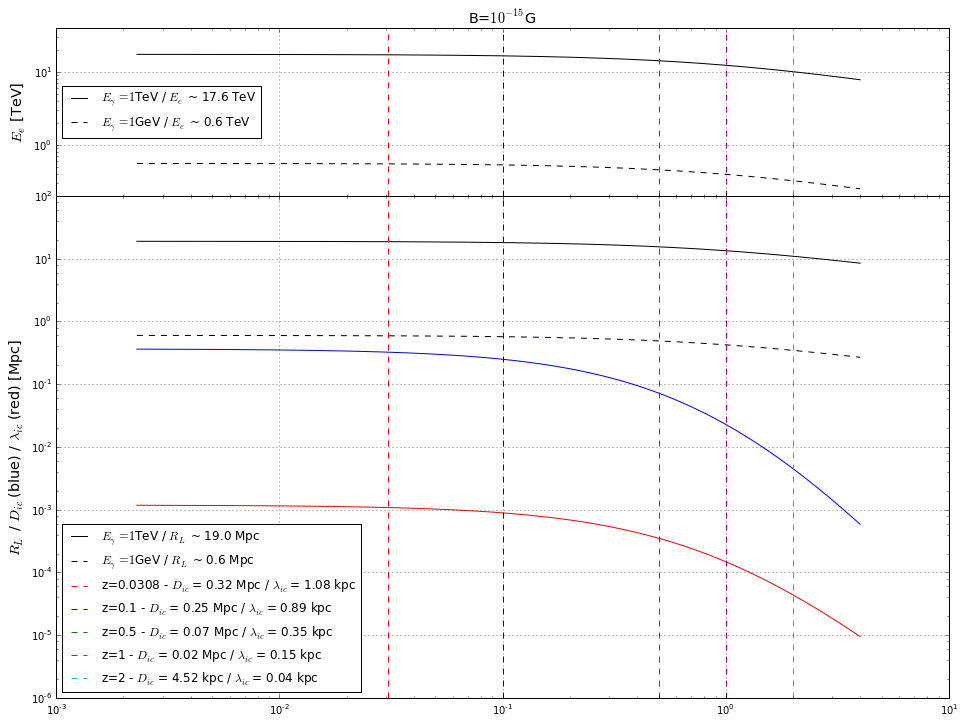

In [6]:
%matplotlib inline
from matplotlib.pyplot import figure, show, setp
from matplotlib import gridspec
from numpy import arange
from modules.analytic import Ee, RL, lambdaIC, Dic

fig = figure(figsize=(16,12))
gs = gridspec.GridSpec(2, 1, height_ratios=[1,3]) 
fig.subplots_adjust(hspace=0.001)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1],sharex=ax1)

nz = 5000
zmin = 2.3e-3
zmax = 4.
z = zmin*(zmax/zmin)**(arange(nz)/(nz-1.))

ax1.plot(z,Ee(1000,z)*1e-3     ,color='k',linestyle='-' ,label="$E_\gamma = 1$TeV / $E_e$ ~ %1.1f TeV"%(Ee(1000)*1e-3))
ax1.plot(z,Ee(1,z)*1e-3        ,color='k',linestyle='--',label="$E_\gamma = 1$GeV / $E_e$ ~ %1.1f TeV"%(Ee(1)*1e-3))
ax2.plot(z,RL(Ee(1000,z),1e-15),color='k',linestyle='-' ,label="$E_\gamma = 1$TeV / $R_L$ ~ %1.1f Mpc"%(RL(Ee(1000),1e-15)))
ax2.plot(z,RL(Ee(1,z),1e-15)   ,color='k',linestyle='--',label="$E_\gamma = 1$GeV / $R_L$ ~ %1.1f Mpc"%(RL(Ee(1),1e-15)))
ax2.plot(z,Dic(1000,z)         ,color='b',linestyle='-')
ax2.plot(z,lambdaIC(z)         ,color='r',linestyle='-')

label="z=0.0308 - $D_{ic}$ = %1.2f Mpc / $\lambda_{ic}$ = %1.2f kpc"%(Dic(1000,0.0308),lambdaIC(0.0308)*1e3)
ax1.axvline(x=0.0308,ymin=0.,ymax=10.,color='r',linestyle='--')
ax2.axvline(x=0.0308,ymin=0.,ymax=10.,color='r',linestyle='--',label=label)
label="z=0.1 - $D_{ic}$ = %1.2f Mpc / $\lambda_{ic}$ = %1.2f kpc"%(Dic(1000,0.1),lambdaIC(0.1)*1e3)
ax1.axvline(x=0.1   ,ymin=0.,ymax=10.,color='b',linestyle='--')
ax2.axvline(x=0.1   ,ymin=0.,ymax=10.,color='b',linestyle='--',label=label)
label="z=0.5 - $D_{ic}$ = %1.2f Mpc / $\lambda_{ic}$ = %1.2f kpc"%(Dic(1000,0.5),lambdaIC(0.5)*1e3)
ax1.axvline(x=0.5   ,ymin=0.,ymax=10.,color='g',linestyle='--')
ax2.axvline(x=0.5   ,ymin=0.,ymax=10.,color='g',linestyle='--',label=label)
label="z=1 - $D_{ic}$ = %1.2f Mpc / $\lambda_{ic}$ = %1.2f kpc"%(Dic(1000,1),lambdaIC(1)*1e3)
ax1.axvline(x=1     ,ymin=0.,ymax=10.,color='m',linestyle='--')
ax2.axvline(x=1     ,ymin=0.,ymax=10.,color='m',linestyle='--',label=label)
label="z=2 - $D_{ic}$ = %1.2f kpc / $\lambda_{ic}$ = %1.2f kpc"%(Dic(1000,2)*1e3,lambdaIC(2)*1e3)
ax1.axvline(x=2     ,ymin=0.,ymax=10.,color='c',linestyle='--')
ax2.axvline(x=2     ,ymin=0.,ymax=10.,color='c',linestyle='--',label=label)


ax1.set_title("B=$10^{-15}$G",fontsize="x-large")

ax1.set_xscale('log')   
ax1.set_yscale('log')
ax1.set_ylim([0.2,40])
ax1.grid(b=True,which='major')
ax1.legend(loc="best")
ax1.set_ylabel("$E_e$ [TeV]",fontsize="x-large")
xticklabels = ax1.get_xticklabels()
setp(xticklabels, visible=False)

ax2.set_xscale('log')   
ax2.set_yscale('log')
#ax2.set_ylim([0.2,40])
ax2.grid(b=True,which='major')
ax2.legend(loc="best")
ax2.set_ylabel("$R_L$ / $D_{ic}$ (blue) / $\lambda_{ic}$ (red) [Mpc]",fontsize="x-large")

show()

$R_L$ ne dépend pas du redshift (z) en première approximation 

| $\lambda_B $ | $>R_L$ = 19 Mpc                  | $< R_L$ = 0.6 Mpc                |
|:------------:|:--------------------------------:|:--------------------------------:|
| $>D_{ic}(z)$ | leptons coincés dans une cellule | leptons coincés dans une cellule |
| $<D_{ic}(z)$ | leptons coincés dans une cellule | isotropisation (~)               |


* $\theta_{mean}$: si cas "leptons coincés dans une cellule" => déflexion moyenne tout le temps la même (haute) 
* $\theta_{mean}$: si cas "isotropisation" => déflexion moyenne plus basse

résultats très différents des estimations analytiques!

## Halo size Versus EGMF

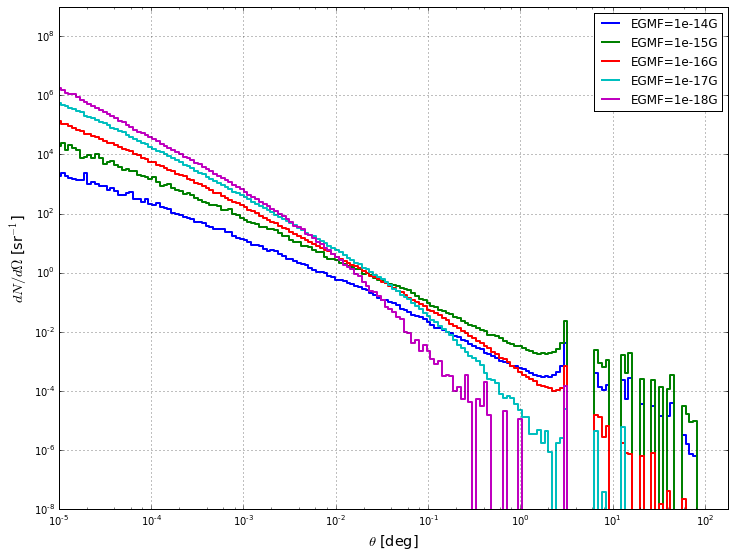

In [3]:
%matplotlib inline
import modules.arrival_angle
modules.arrival_angle.drawArrivalAngle(["EGMF=1e-14G","EGMF=1e-15G","EGMF=1e-16G","EGMF=1e-17G","EGMF=1e-18G"])

In [6]:
from numpy import zeros, size, nditer, average, savetxt, set_printoptions
from matplotlib.pyplot import figure, show
from modules.read import select_events
from modules.analytic import degre, yr

Redshifts=["0.04","0.14","0.4","1","2"] 
EGMFs=["12","13","14","15","16","17","18"]

theta_mean = zeros((size(Redshifts)+1,size(EGMFs)+1))

def compute_mean_delay_and_theta(i,j):
   if i==0:
      theta_mean[i,0] = 0
      theta_mean[i,j] = 10**(-float(EGMFs[j-1]))          
   else:
      theta_mean[i,0]  = Redshifts[i-1]
      fileId="Simulations/z="+Redshifts[i-1]+"/EGMF=1e-"+EGMFs[j-1]+"G"
      weight, energy, time, theta_arrival, theta, phi, gen = select_events(fileId,Erange=[1,1e3],delayrange=[1e-4*yr,10*yr],powerlaw_index=1.2)
      theta_mean[i,j]=average(theta_arrival,weights=weight)/degre

it=nditer(theta_mean, flags=['multi_index'], op_flags=['readwrite'])
while not it.finished:
   compute_mean_delay_and_theta(it.multi_index[0],it.multi_index[1])    
   it.iternext()

savetxt("Results/theta_mean_vs_EGMF-bis.dat", theta_mean, fmt='%1.4e')

set_printoptions(precision=2)
print(theta_mean)

[[  0.00e+00   1.00e-12   1.00e-13   1.00e-14   1.00e-15   1.00e-16
    1.00e-17   1.00e-18]
 [  4.00e-02   5.45e-01   8.03e-01   2.74e+00   1.30e-01   4.19e-03
    3.31e-03   2.28e-03]
 [  1.40e-01   1.48e-01   1.62e-01   1.21e-01   1.69e-01   8.87e-04
    1.01e-03   9.89e-04]
 [  4.00e-01   1.40e-02   3.16e-01   9.10e-03   7.44e-04   1.83e-04
    2.43e-04   2.58e-04]
 [  1.00e+00   1.28e-03   1.57e-03   6.50e-04   1.22e-04   6.72e-05
    9.30e-05   8.11e-05]
 [  2.00e+00   1.64e-04   1.92e-04   4.56e-05   2.66e-05   5.09e-05
    7.00e-05   4.70e-05]]


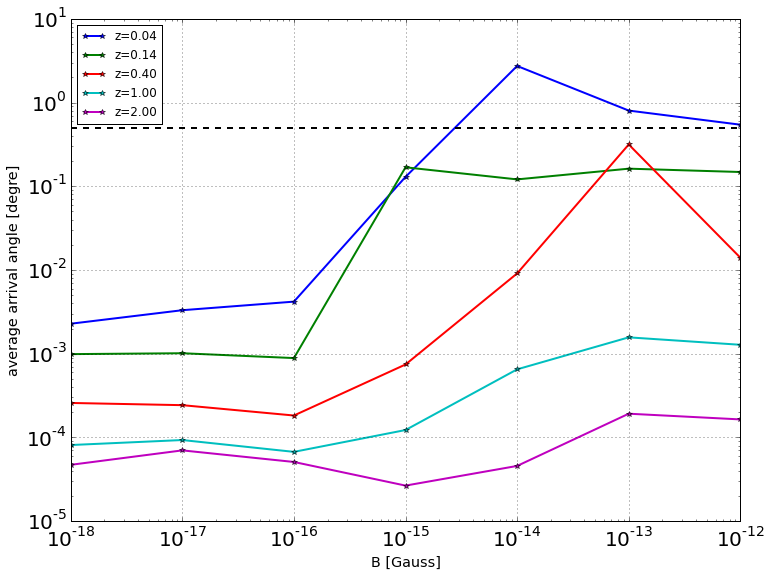

In [4]:
%matplotlib inline
from matplotlib.pyplot import figure, show, setp
from numpy import log10, loadtxt
from src.analytic import Ee, Delta, pi

ax = figure(figsize=(12,9)).add_subplot(111)  

theta_mean  = loadtxt("Results/theta_mean_vs_EGMF-bis.dat")
Redshifts = theta_mean[1:,0]
B         = theta_mean[0,1:]

i=1
for z in Redshifts: 
   ax.plot(B,theta_mean[i,1:],'-*',linewidth=2,label="z=%1.2f"%z)      
   i+=1

ax.axhline(y=0.5,color="k",linewidth=2,linestyle="--")
   
ax.set_xscale('log')   
ax.set_yscale('log')
#ax.set_ylim([0.8e-3,20])
ax.grid(b=True,which='major')
ax.legend(loc="best")
ax.set_xlabel("B [Gauss]",fontsize="x-large")
ax.set_ylabel("average arrival angle [degre]",fontsize="x-large")

show()